In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [3]:
datasets=["EURUSD=X"]


for dataset in datasets:

    Ticker = yf.Ticker(dataset)
    data = Ticker.history(start="2023-08-01", end="2023-08-17")
    filename = f"{dataset}_data.csv"
    data.to_csv(filename)
    print(f"Download data for {dataset} and saved as  {filename}")

Download data for EURUSD=X and saved as  EURUSD=X_data.csv


In [24]:
Ticker ='EURUSD=X'
start_date = "2023-08-01"
end_date = "2023-08-17"
data = yf.download(Ticker, start=start_date,  end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [25]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-01,1.099759,1.100231,1.095446,1.099759,1.099759,0
2023-08-02,1.100788,1.100703,1.091977,1.100788,1.100788,0
2023-08-03,1.094415,1.095398,1.091358,1.094415,1.094415,0
2023-08-04,1.095158,1.104094,1.093625,1.095158,1.095158,0
2023-08-07,1.100267,1.101200,1.096611,1.100267,1.100267,0
2023-08-08,1.100316,1.100982,1.093099,1.100316,1.100316,0
2023-08-09,1.095890,1.099433,1.095590,1.095890,1.095890,0
2023-08-10,1.097767,1.105840,1.096804,1.097767,1.097767,0
2023-08-11,1.098165,1.100437,1.095182,1.098165,1.098165,0


In [19]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume,Daily Return,lag_1,lag_2,lag_3,lag_4,lag_5
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.0,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,1.096237,1.099323,1.092896,1.096237,1.096237,0.0,-0.000771,-0.000771,-0.000771,-0.000771,-0.000771,-0.000771
std,0.003590,0.003926,0.002991,0.003590,0.003590,0.0,0.003017,0.003017,0.003017,0.003017,0.003017,0.003017
min,1.090417,1.093470,1.087749,1.090417,1.090417,0.0,-0.005789,-0.005789,-0.005789,-0.005789,-0.005789,-0.005789
25%,1.094427,1.095716,1.090721,1.094427,1.094427,0.0,-0.003273,-0.003273,-0.003273,-0.003273,-0.003273,-0.003273
50%,1.095890,1.100437,1.093099,1.095890,1.095890,0.0,0.000044,0.000044,0.000044,0.000044,0.000044,0.000044
75%,1.099216,1.101091,1.095386,1.099216,1.099216,0.0,0.000807,0.000807,0.000807,0.000807,0.000807,0.000807
max,1.100788,1.105840,1.096804,1.100788,1.100788,0.0,0.004665,0.004665,0.004665,0.004665,0.004665,0.004665


In [26]:
data.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.681652,0.635177,1.000000,1.000000,NaN
High,0.681652,1.000000,0.768459,0.681652,0.681652,NaN
Low,0.635177,0.768459,1.000000,0.635177,0.635177,NaN
Close,1.000000,0.681652,0.635177,1.000000,1.000000,NaN
Adj Close,1.000000,0.681652,0.635177,1.000000,1.000000,NaN
Volume,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: title={'center': 'EUR/USD Monthly'}, xlabel='Date'>

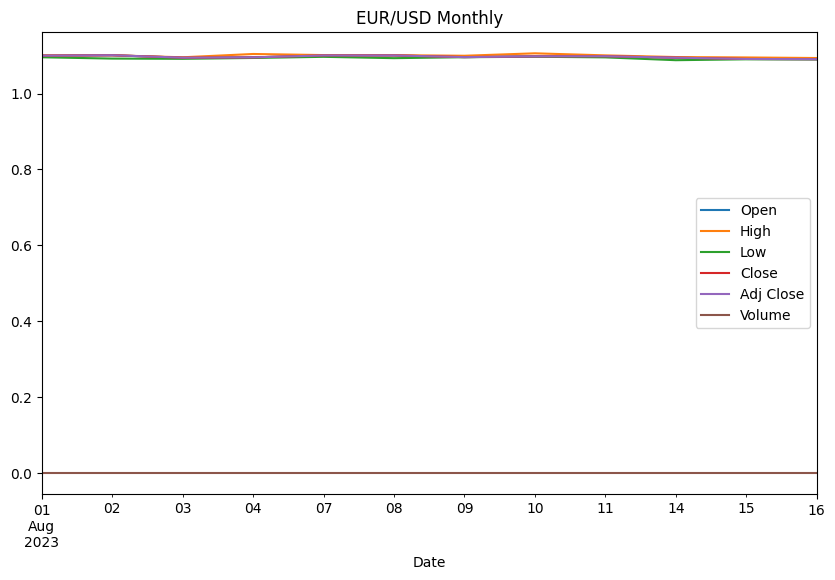

In [27]:
data.plot(figsize=(10, 6), title='EUR/USD Monthly')

In [22]:
data['Daily Return'] = data['Adj Close'].pct_change()

In [7]:
for i in range(1, 6):
    data[f'lag_{i}'] = data['Adj Close'].pct_change()

In [8]:
data.dropna(inplace=True)

In [10]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,Daily Return,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,,,,,,,,
2023-08-10,1.097767,1.105840,1.096804,1.097767,1.097767,0,0.001712,0.001712,0.001712,0.001712,0.001712,0.001712
2023-08-11,1.098165,1.100437,1.095182,1.098165,1.098165,0,0.000362,0.000362,0.000362,0.000362,0.000362,0.000362
2023-08-14,1.094439,1.096035,1.087749,1.094439,1.094439,0,-0.003393,-0.003393,-0.003393,-0.003393,-0.003393,-0.003393
2023-08-15,1.090988,1.094966,1.090085,1.090988,1.090988,0,-0.003153,-0.003153,-0.003153,-0.003153,-0.003153,-0.003153
2023-08-16,1.090417,1.093470,1.089776,1.090417,1.090417,0,-0.000523,-0.000523,-0.000523,-0.000523,-0.000523,-0.000523


In [11]:
X = data.drop(['Adj Close', 'Daily Return'], axis=1)
y = data['Daily Return']

In [12]:
from numpy.random.mtrand import random
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
predictions = model.predict(X_test)

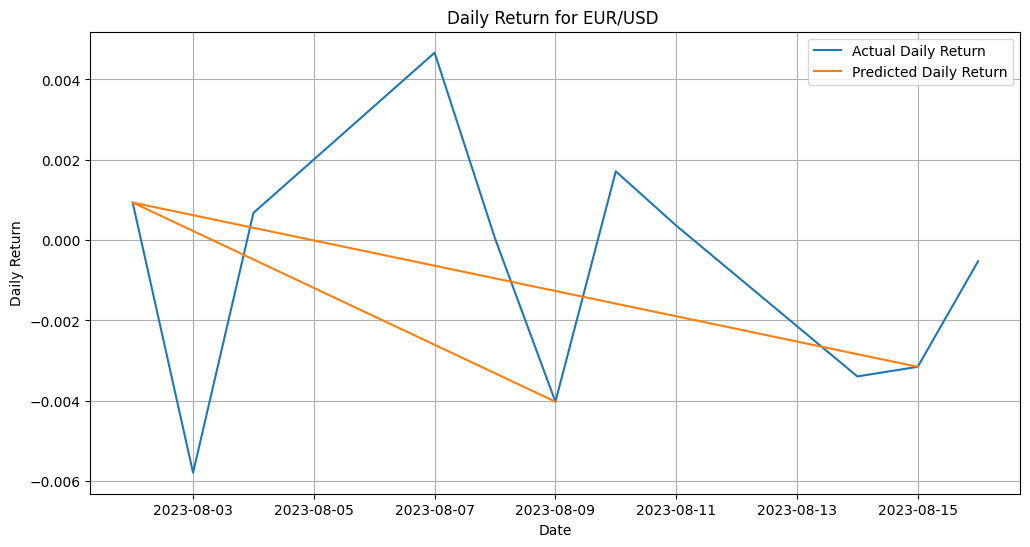

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Daily Return'], label='Actual Daily Return')
plt.plot(X_test.index, predictions, label='Predicted Daily Return')
plt.title(f"Daily Return for EUR/USD ")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend()
plt.grid()
plt.show()